# Introduction

Problems : Kaggle have recorded it's user activity data and wants to evaluate the user engagement

Metric : Daily active user are one of the key metric to evalute how the user engage with our product. Especially when the product is an application or software services. With daily active user we can see the magnitude of user activty in our platform on a daily basis. From this metric we can see the customer usage trends and how the feature of our product are used. We can then evaluate which feature are the most popular and least popular among user and make adjustment according to the user activity.

This project objective is to analyze kaggle daily active user from 2015 to 2020. The dataset from this project will be the top ranked kaggler daily user activity accessed from kaggle https://www.kaggle.com/datasets/tomtillo/top-ranked-kaggle-user-activity-1-1000-ranks

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [3]:
# Load dataset
df = pd.read_csv('USER_ACTIVITY.csv')

In [4]:
# Dataset preview
df.head()

,date,submissions,scripts,comments,datasets,username
0,2019-08-14,0,14,0,0,a03102030
1,2019-08-16,0,5,0,0,a03102030
2,2019-08-17,0,16,1,0,a03102030
3,2019-08-18,0,2,0,0,a03102030
4,2019-08-19,0,2,1,0,a03102030


In [5]:
# Dataset preview
df.tail()

,date,submissions,scripts,comments,datasets,username
202886,2020-07-09,5,0,0,0,zzy990106
202887,2020-07-11,3,0,0,0,zzy990106
202888,2020-07-14,5,0,0,0,zzy990106
202889,2020-07-15,5,0,0,0,zzy990106
202890,2020-05-22,0,0,0,1,zzy990106


Dataset consist of 6 variables which is

variable | definition
---|---
date | The date of activity recorded
submissions | The ammount of user competition submission in the day
scripts | The ammount of user scripts run
comments | The ammount of user comments
datasets | The ammount of datasets published/updated
username | The user username

In [6]:
# Checking each column assigned data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202891 entries, 0 to 202890
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         202891 non-null  object
 1   submissions  202891 non-null  int64 
 2   scripts      202891 non-null  int64 
 3   comments     202891 non-null  int64 
 4   datasets     202891 non-null  int64 
 5   username     202891 non-null  object
dtypes: int64(4), object(2)
memory usage: 9.3+ MB


* The dataset consist of 202891 rows and 6 columns
* There are 4 numerical column, and 2 categorical columns
* There is a date column with object datatype, so we need to convert it to datetime

In [7]:
# Convert date column from object type to datetime type
df['date'] = pd.to_datetime(df['date'])

For the purpose of gaining more context about the user engagement trends and see the bigger picture we will also made a year column and month column to investigate annual and monthly user activity trends.

In [8]:
# Adding year and month columns to see trends annualy and monthly
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

For the daily activity user analysis we are going to limit the range of daily user activity to the last 30 days of the recorded user activity in the dataset

In [9]:
# Defining the last 30 days of user activity
last_30d = (df['date'] > '2020-06-16') & (df['date'] <= '2020-07-16')

# Creating a specific dataframe for the last 30 days of user activity
df_30d = df.loc[last_30d]

# Exploratory Data Analysis

In [10]:
df['date'].sort_values()

181297   2015-04-09
41693    2015-04-09
40089    2015-04-09
181298   2015-04-10
41694    2015-04-10
            ...    
70272    2020-07-16
201933   2020-07-16
138964   2020-07-16
146697   2020-07-16
99849    2020-07-16
Name: date, Length: 202891, dtype: datetime64[ns]

The recorded daily user activity in the dataset began from 09-04-2015 and end in 16-07-2020

For analyzing this case we will be looking for kaggle active user trends across time period. First we are going to look at the big picture and investigate annual kaggle active user.

Text(0.5, 1.0, 'Annual User Activity')

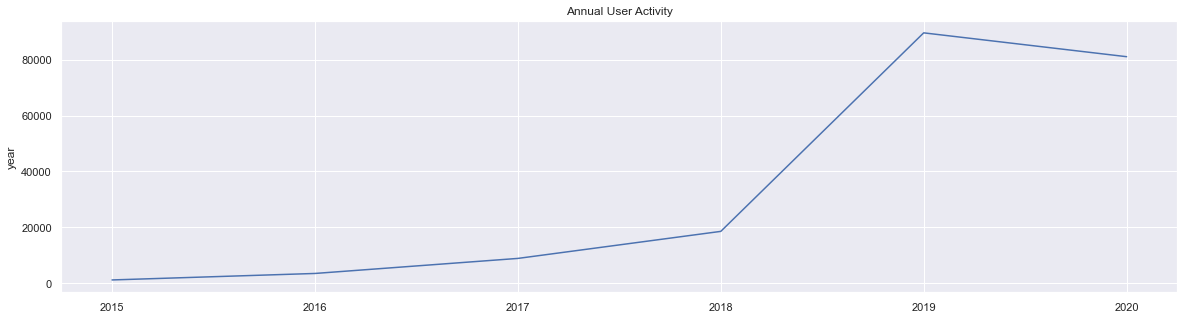

In [13]:
# Define date counts for annual trends
year_freq = df['year'].value_counts()

# visualize chart
sns.set()
plt.figure(figsize=(20,5))
sns.lineplot(x=year_freq.index,y=year_freq)
plt.title('Annual User Activity')

We can see from the chart that there's an low increase of active user from 2015 to 2018. Then there's a sharp increase of active user that peaked at 2019. Unfortunately from 2019 to 2020 there's a decreasing trends.

Now we know there's a decreasing trend last year so we need to see what are the monthly trends of active user to get a detailed look of the decreasing trends.

Text(0.5, 1.0, 'Monthly User Activity in 2020')

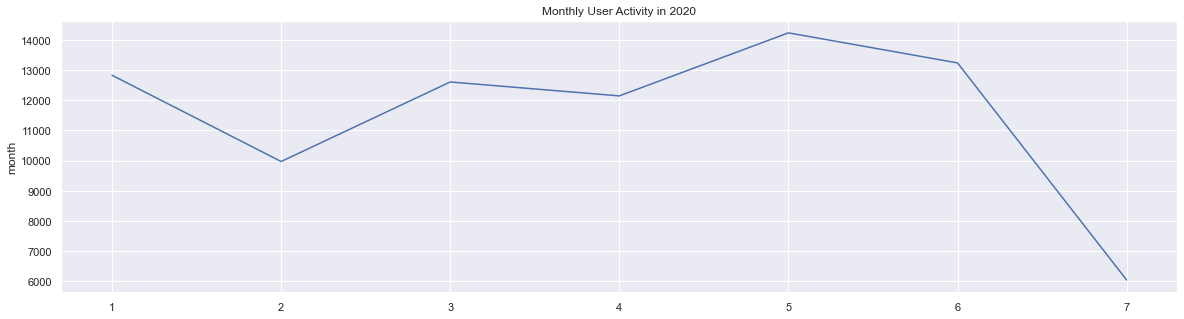

In [12]:
# Define date counts for monthly trends last year
monthly_freq = df[(df['year']==2020)]['month'].value_counts()

# visualize chart
sns.set()
plt.figure(figsize=(20,5))
sns.lineplot(x=monthly_freq.index,y=monthly_freq)
plt.title('Monthly User Activity in 2020')

So for the monthly trends in 2020 the decrease wasn't found all throughout the month. We can see there's actually increase of user activity form February to March and from April to May. User activity start to decrease sharply from June to July.

Since we seen there's a sharp decrease from June to July let's now look at the daily user activity from the last 30 days and investigate how the trends fluctuate in a daily basis.

Text(0.5, 1.0, 'Daily Active User Last 30 Day')

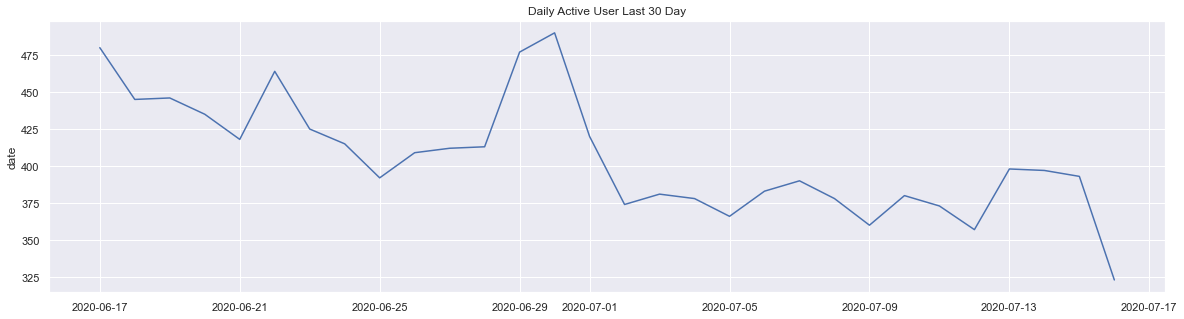

In [12]:
# Define date counts
date_freq = df_30d['date'].value_counts()

# visualize chart
sns.set()
plt.figure(figsize=(20,5))
sns.lineplot(x=date_freq.index,y=date_freq)
plt.title('Daily Active User Last 30 Day')

From the data visualization we can see that generally the daily trends for daily active user in the last 30 days was decreasing if we compare the begining of the period to the end. Although we can also see a sharp increase of the daily active user amount in the middle of the period.

Besides investigating the daily user activity from the login record, we can also see the user use kaggle feature to see their engagement trends for the last 30 days.

Text(0.5, 1.0, 'Daily Submissions Last 30 Day')

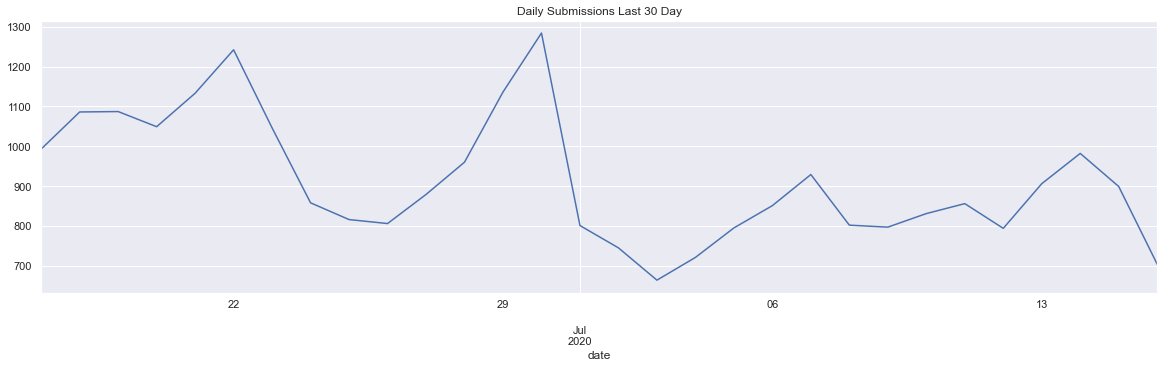

In [13]:
# Create visualization for user daily submission in the last 30 days
plt.figure(figsize=(20,5))
df_30d.groupby('date').sum()['submissions'].plot(kind='line')
plt.title('Daily Submissions Last 30 Day')

Daily user activity on submissions feature shows a few instance of increase near the begining, at the middle and near the end, but generally the trends are decreasing in the end period compared to the begining

Text(0.5, 1.0, 'Daily Scripts Last 30 Day')

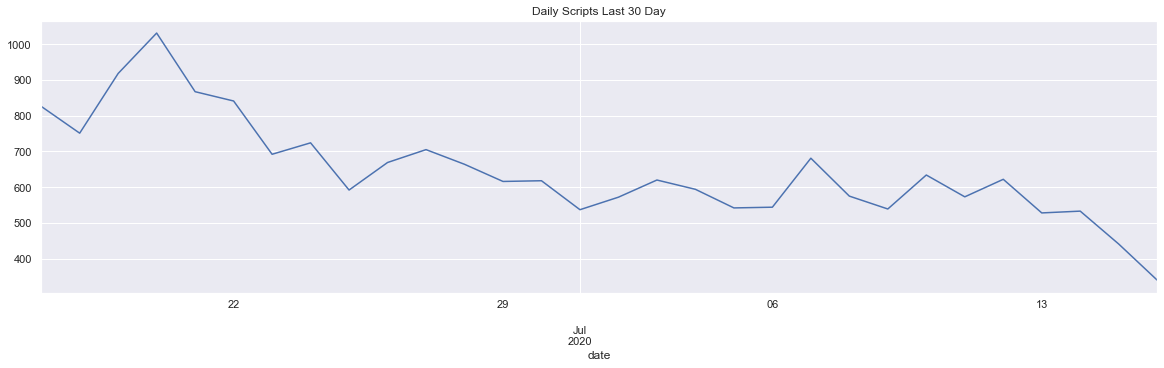

In [14]:
# Create visualization for user daily scripts in the last 30 days
plt.figure(figsize=(20,5))
df_30d.groupby('date').sum()['scripts'].plot(kind='line')
plt.title('Daily Scripts Last 30 Day')

User scripts run also generally shows decreasing trends with the only notable increase happen near the begining of the period.

Text(0.5, 1.0, 'Daily Comments Last 30 Day')

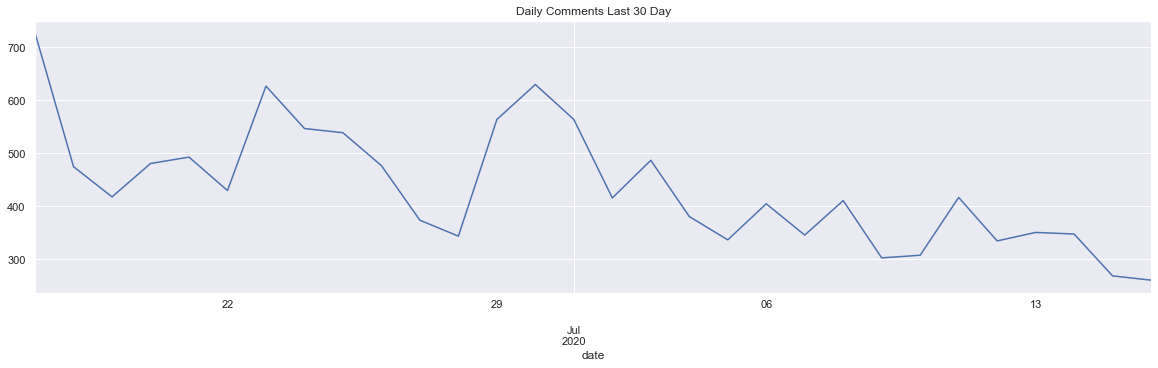

In [15]:
# Create visualization for user daily comments in the last 30 days
plt.figure(figsize=(20,5))
df_30d.groupby('date').sum()['comments'].plot(kind='line')
plt.title('Daily Comments Last 30 Day')

User comments fluctuate quite often along the 30 days period but the trends are generaly decreasing at the end of period.

Text(0.5, 1.0, 'Daily Datasets Last 30 Day')

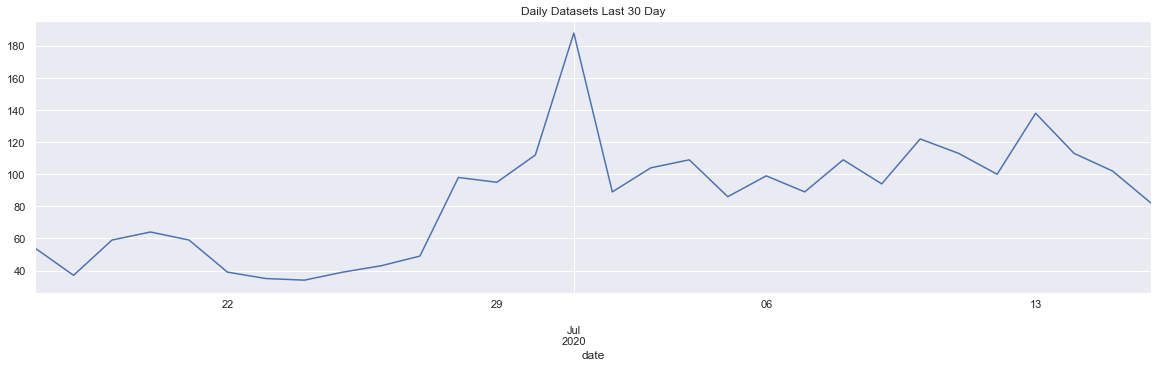

In [16]:
# Create visualization for user daily dataset in the last 30 days
plt.figure(figsize=(20,5))
df_30d.groupby('date').sum()['datasets'].plot(kind='line')
plt.title('Daily Datasets Last 30 Day')

The user daily dataset submit/ update shows a sharp increase in the middle of the period and are generally shows increase at the end compared to the begining

# Conclusion

* User annual trends was growing up until 2019, then there’s a decreasing trends in 2020
* A more detailed look of monthly user activity in 2020 shows the decreasing trends wasn't found every month. There are a couple instance of increasing trends in February to March and April to May
* Daily user activity in the last 30 days also shows decreasing trends. There are generally decreasing trends across all feature in Kaggle such as submission, script and comments. But there are increasing dataset trends in the last 30 days.
* These decreasing trends means that Kaggle are losing their user more and more each day
* To offset these diminishing user Kaggle can adapt a customer retention strategy like improving platform feature or since Kaggle are community based platform invest in community building plan to increase the user engagement.